# Lab 4: Visualisation and transformation

### Learning goals

- Learn how to construct a multi-layered chart using matplotlib
- Learn how to design a chart to communicate statistical information
- The Log-linear and Log-Log transformation
- Create ready-designed statistical charts using Seaborn
- Long-wide-long transformation of data frames
- How to get help on creating other types of charts


### Literature

- ROS Ch. 2
- [PDS ch. 4](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html)



### Why visualisation is important

In many statistics courses, visualisation and charting are largely ignored or even worse, treated in a derogatory way. This is a shame. Because good statisticians and empirical researchers use visualisations at every step of the analysis process: Data and hypothesis exploration, specification and model checking, and communication of results.  

### What is matplotlib

Matplotlib is the main data visualisation package used in the Python universe. It is not like the simple plotting functionality you might find in Excel or other commercial software, where you can relatively easily make a few standard charts: Scatter, bar, etc. 

You can easily make standard charts in matplotlib with the sub-package pyplot (as well as the visualisation functions in Pandas that builds on matplotlib). But matplotlib is much broader. It allows you to basically map data to a 2d visual plane in almost any way imagineable (given enough time and patience). 

The approach taken is to use multiple "layers" of information plotted on-top of each other. 

Making good plots is a mix of statistical and psychological science with aesthetic art. Personally, I find it to be one of the most fun and rewarding aspects of doing a data analysis. It can also be frustrating. 

Good luck!

# Building a chart: Comparison, facets, and showing multiple information on the same chart.

<iframe src="https://ntnu.cloud.panopto.eu/Panopto/Pages/Embed.aspx?id=11617cdd-1680-465e-b7fb-aee600d9406f&autoplay=false&offerviewer=true&showtitle=true&showbrand=true&captions=false&interactivity=all" height="405" width="720" style="border: 1px solid #464646;" allowfullscreen allow="autoplay"></iframe>

We'll start by importing some of our standard packages. We import to versions of matplotlib: the suit of easy-plotting routines in pyplot, which we call *plt*, and the full package of functions in matplotlib, which we call *mpl*.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

pd.set_option('max_columns', None) # to show all columns of a pandas Data Frame
%matplotlib inline

We'll load in our Penn World Tables data again

In [37]:
pwt = pd.read_csv("https://jmaurit.github.io/anv_statistikk/data/pwt100.csv", sep=";", decimal=",")

In [38]:
pwt

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,ccon,cda,cgdpe,cgdpo,cn,ck,ctfp,cwtfp,rgdpna,rconna,rdana,rnna,rkna,rtfpna,rwtfpna,labsh,irr,delta,xr,pl_con,pl_da,pl_gdpo,i_cig,i_xm,i_xr,i_outlier,i_irr,cor_exp,statcap,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12805,ZWE,Zimbabwe,US Dollar,2015,40141.61719,39798.64453,13.814629,6.393752,NaN,2.584653,44249.35547,47325.46094,39961.22266,39455.90234,61790.62891,0.000823,0.386632,0.447125,42008.19922,47591.10156,50701.22656,64916.47656,0.949428,0.999666,1.081122,0.533381,0.247887,0.052084,1.0,0.489015,0.499562,0.505960,ICP PPP timeseries: benchmark or interpolated,Benchmark,Market-based,Regular,Regular,0.306506,62.222200,0.945086,0.077963,0.176403,0.140172,-0.287693,-0.051930,0.479228,0.651287,0.541446,0.616689,0.533235,0.422764,1.533909
12806,ZWE,Zimbabwe,US Dollar,2016,41875.20313,40963.19141,14.030331,6.504374,NaN,2.616257,43291.56641,46404.16016,41680.89453,40864.16406,64844.19141,0.000844,0.385642,0.423063,42325.72656,44405.12109,47610.62500,66257.85938,0.974653,0.980511,0.988295,0.533381,0.249504,0.053471,1.0,0.481638,0.493000,0.502853,ICP PPP timeseries: benchmark or interpolated,Benchmark,Market-based,Regular,Regular,0.302841,55.555533,0.890514,0.076169,0.168887,0.131920,-0.251232,-0.016258,0.470640,0.651027,0.539631,0.619789,0.519718,0.416510,1.491724
12807,ZWE,Zimbabwe,US Dollar,2017,44672.17578,44316.74219,14.236595,6.611773,NaN,2.648248,46113.94531,49457.57031,44672.17578,44316.74219,67627.56250,0.000860,0.402779,0.432392,44316.74219,46113.94531,49457.57422,67627.56250,1.000000,1.000000,1.000000,0.533381,0.261848,0.054693,1.0,0.482794,0.493392,0.497349,Benchmark,Benchmark,Market-based,Regular,Regular,0.301868,59.999967,0.833453,0.075448,0.207101,0.126722,-0.202827,-0.039897,0.473560,0.639560,0.519956,0.619739,0.552042,0.415592,1.514525
12808,ZWE,Zimbabwe,US Dollar,2018,44325.10938,43420.89844,14.438802,6.714952,NaN,2.680630,46198.44141,49665.38672,44342.45313,43567.51172,68826.77344,0.000853,0.382059,0.418766,46457.09766,46235.14453,49771.04297,69059.62500,1.024108,1.018163,0.977410,0.533381,0.284147,0.055759,1.0,0.540223,0.548268,0.558020,Extrapolated,Benchmark,Market-based,Regular,Regular,NaN,59.999967,0.790588,0.079576,0.269799,0.144485,-0.263658,-0.020791,0.543757,0.655473,0.529867,0.641361,0.561526,0.425143,1.590120


Again, we'll create a variable for real gdp per person

In [39]:
pwt["rgdpe_per_pers"] = pwt["rgdpe"]/pwt["pop"]

And we'll limit our data to 2019

In [40]:
pwt2019 = pwt.loc[pwt.year==2019]

A bit of cleaning: we'll delete rows were we have missing data

In [41]:
pwt2019 = pwt2019.loc[(pwt2019.rgdpe_per_pers.notna()) & (pwt2019.hc.notna())]

Using pyplot, we can quickly create a chart. Below I create a scatter chart comparing gdp per person and the "Human Capital" index for countries--basically an index of the productive capacity of the workforce in terms of education, nutrition, skills, etc. 

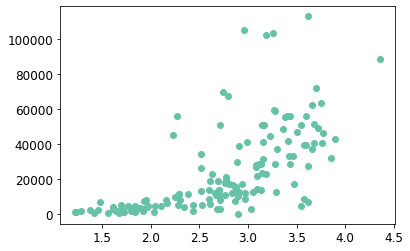

In [42]:
plt.scatter(x=pwt2019.hc, y=pwt2019.rgdpe_per_pers)

But we may not be quite happy with the way that the chart appears. Luckily, we can adjust almost every aspect of the charting. Below I do this by changing the default settings for pyplot charts, so that all subsequent charts will have a new, hopefully better look: 

In [43]:
from cycler import cycler

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams["axes.labelsize"]= 12
plt.rcParams["figure.facecolor"] = "#f2f2f2"
#plt.rcParams['figure.savefig.dpi'] = 100
plt.rcParams['savefig.edgecolor'] = "#f2f2f2"
plt.rcParams['savefig.facecolor'] ="#f2f2f2"
plt.rcParams["figure.figsize"] = [16,10]
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['font.size'] = 14
greens = ['#66c2a4','#41ae76','#238b45','#006d2c','#00441b']
multi =['#66c2a4','#1f78b4','#a6cee3','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f']
plt.rcParams["axes.prop_cycle"] = cycler(color=multi)





Now let's do the same plot again, this time a bit more formally. 

Text(0, 0.5, 'Real GDP per person')

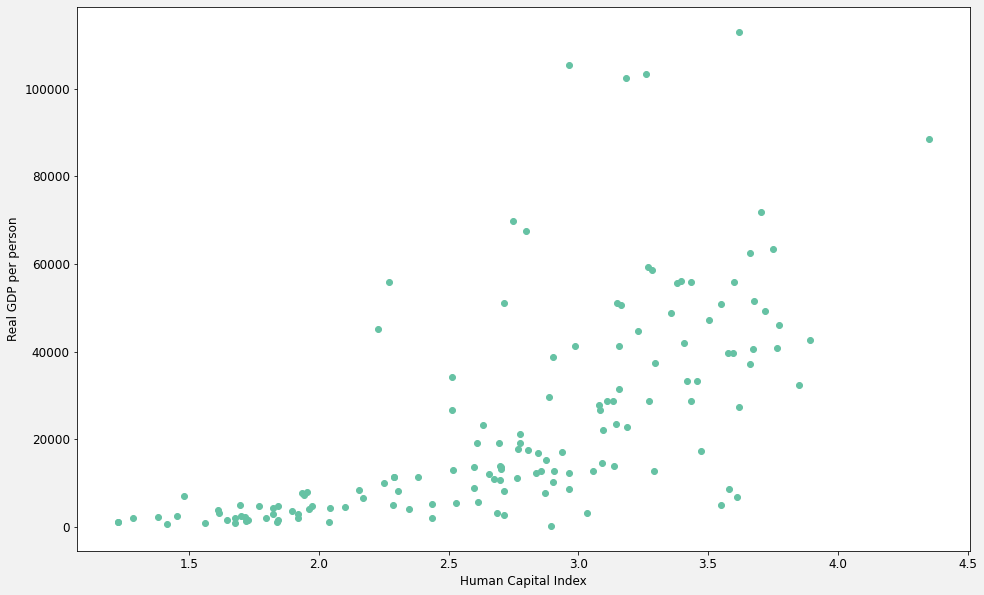

In [44]:
fig, ax = plt.subplots()
ax.scatter(x=pwt2019.hc, y=pwt2019.rgdpe_per_pers)
ax.set_xlabel("Human Capital Index")
ax.set_ylabel("Real GDP per person")


The first line from above - formally defining the figure and axis - is not strictly necessary, but it gives us more flexibility if we want to make changes to our chart - which we often do. 

We see for example that we have some particularly high values of real per-capital GDP, and we might want to add labels to these values. 

We can first find these outliers by specifying we want to select data where GDP per-capita is higher than 80,000: 

In [45]:
outliers = pwt2019.loc[pwt2019.rgdpe_per_pers>80000, ["hc","rgdpe_per_pers", "country"]]

In [46]:
outliers

,hc,rgdpe_per_pers,country
5599,3.185517,102353.631453,Ireland
7209,3.619643,112941.453350,Luxembourg
7349,2.962418,105337.890061,"China, Macao SAR"
9799,3.259456,103445.127287,Qatar
10289,4.351568,88619.305271,Singapore


Now, using a for loop, we can add labels for these points directly onto our chart: 

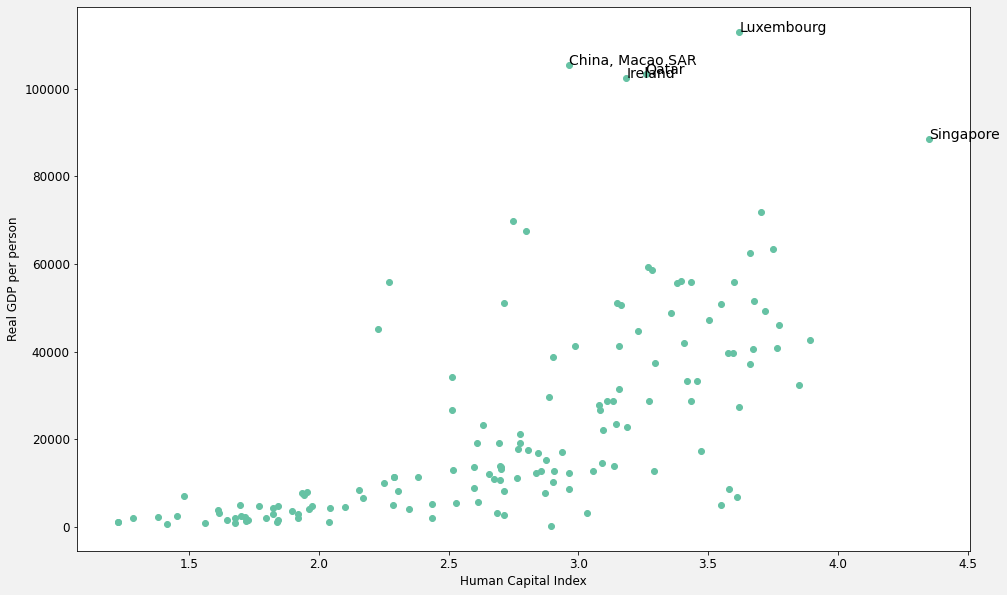

In [47]:
fig, ax = plt.subplots()
ax.scatter(x=pwt2019.hc, y=pwt2019.rgdpe_per_pers)
ax.set_xlabel("Human Capital Index")
ax.set_ylabel("Real GDP per person")
for index, outlier in outliers.iterrows():
    ax.text(outlier.hc, outlier.rgdpe_per_pers, outlier.country)

We might want to manually put in the text for each of the outliers above and adjust the positioning so that they do not overlap each other. On the other hand, the above code shows the advantage to making charts in python and matplotlib: you can incorporate programming techniques in the plot-making process. 

### Log relationships

<iframe src="https://ntnu.cloud.panopto.eu/Panopto/Pages/Embed.aspx?id=4d2e788c-d388-4cd5-9dd9-aee600d94069&autoplay=false&offerviewer=true&showtitle=true&showbrand=true&captions=false&interactivity=all" height="405" width="720" style="border: 1px solid #464646;" allowfullscreen allow="autoplay"></iframe>

If we mentally draw a line through the above chart, we see that we probably have a non-linear relationship.

Since Real GDP is a measure subject to exponential growth (say 2% a year, compounded), then we should consider transforming to a logarithm. 

Let's say that the underlying relationship between human capital and real GDP is: 

$$y = Ae^{bh}$$

Where $y$ is real gdp per person, $h$ is the human capital index, and $b$ is the parameter that determines the rate of growth. (e is the mathematic constant 2.78.... - the base of the natural logarithm)

Taking the log of both sides leads to a linearization of this relationship: 

$$log(y) = log(A) + b*h$$

We can use np.log() to transform our data to logarithm

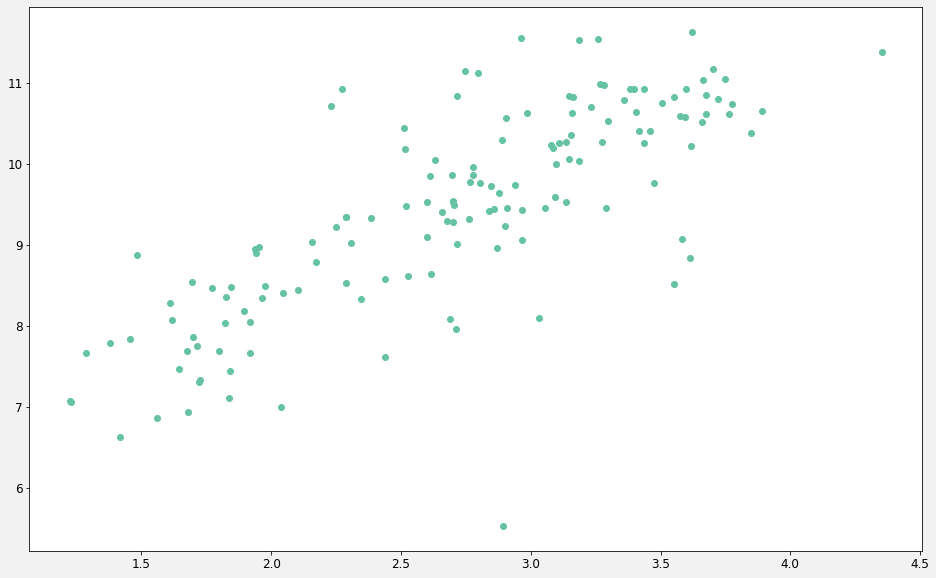

In [48]:
fig, ax = plt.subplots()
ax.scatter(x=pwt2019.hc, y=np.log(pwt2019.rgdpe_per_pers))

Sure enough, the data now looks quite linear. Remember though that we now interpret the slope of the line through the data as the growth rate associated with a human capital index

Another common transformation that we often see in economics is to log-transform both sides

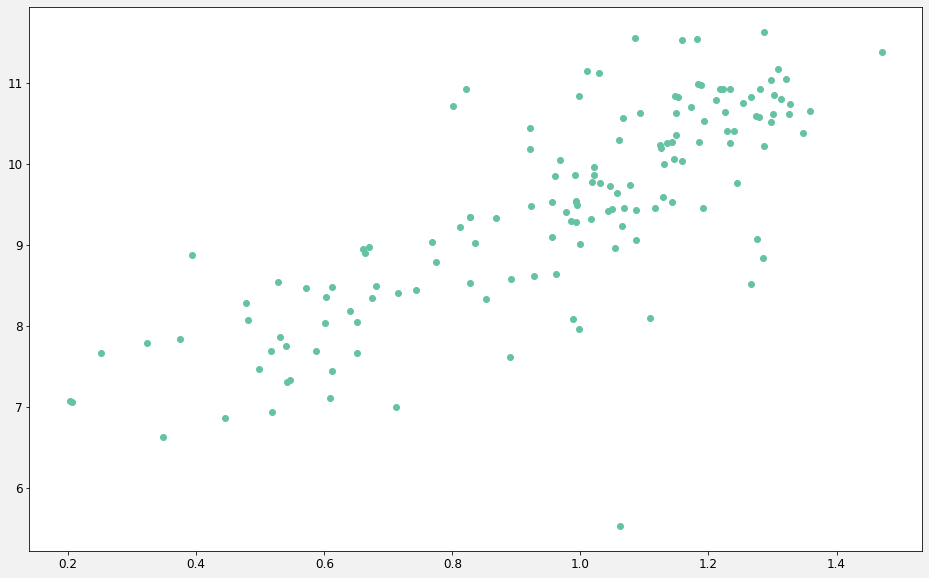

In [267]:
fig, ax = plt.subplots()
ax.scatter(x=np.log(pwt2019.hc), y=np.log(pwt2019.rgdpe_per_pers))

The practical reason for doing this transformation is that now that both x and y variables are interpreted as rates-of-change, then the estimated slope of the line through the data (which here still looks quite linear) can be interpreted as an elasticity: A 1 percentage change in the Human Capital index is associated with a 1 percentage change in real GDP

### Adding a third dimension to a 2-dimensional figure

Matplotlib does allow you to make charts on a 3-dimensional axis, but these tend to be difficult to read and interpret, so I would not generally recommend them. 

But there are several other ways to include information from multiple series in a chart. One method is by using color to denote a value. Below we will assign color to the points according to the labor share of GDP (This is a measure of how labor-intensive GDP is). 

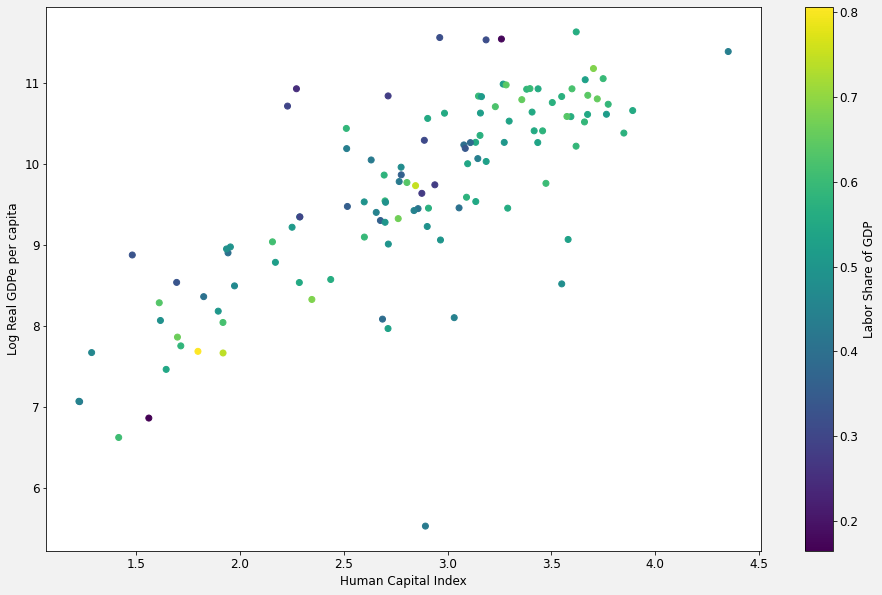

In [51]:
fig, ax = plt.subplots()
s = ax.scatter(x=pwt2019.hc, y=np.log(pwt2019.rgdpe_per_pers), c=pwt2019.labsh)
ax.set_xlabel("Human Capital Index")
ax.set_ylabel("Log Real GDPe per capita")
cb = plt.colorbar(s, ax=ax)
cb.set_label("Labor Share of GDP")
fig.savefig("rgdpxhc.png", dpi=200)

We can add yet another dimension by manipulating the size of the points to reflect the size of the countries. 

First, we can get a list of large countries - those with populations more than 300 million: 

In [54]:
BIG = pwt2019.loc[pwt2019["pop"]>300]
BIG

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,ccon,cda,cgdpe,cgdpo,cn,ck,ctfp,cwtfp,rgdpna,rconna,rdana,rnna,rkna,rtfpna,rwtfpna,labsh,irr,delta,xr,pl_con,pl_da,pl_gdpo,i_cig,i_xm,i_xr,i_outlier,i_irr,cor_exp,statcap,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k,rgdpe_per_pers
2379,CHN,China,Yuan Renminbi,2019,20056066.0,20257660.0,1433.783686,798.807739,2168.918848,2.698987,10566063.0,19703060.0,19919016.0,20118076.0,101544168.0,1.167075,0.400480,0.377223,20572606.0,12331125.0,21638008.0,101703024.0,1.175672,0.966811,1.048805,0.586253,0.075134,0.051895,6.908385,0.755530,0.720062,0.712938,Extrapolated,Extrapolated,Market-based,Regular,Regular,NaN,80.000000,0.387516,0.454168,0.137686,0.192402,-0.167672,-0.004101,0.716501,0.679048,0.865375,0.695068,0.734048,0.457010,0.588816,13988.209097
5529,IND,India,Indian Rupee,2019,8945547.0,9170555.0,1366.417754,497.615723,2122.940682,2.171165,6608023.5,9079422.0,8900328.0,9142121.0,35324124.0,0.416540,0.438098,0.418459,9163052.0,6603997.5,9091771.0,35423256.0,1.129737,1.020127,0.999347,0.521804,0.124115,0.057050,70.419969,0.312882,0.324885,0.316292,Extrapolated,Extrapolated,Market-based,Regular,Regular,NaN,75.555567,0.649357,0.270331,0.073454,0.051035,-0.077878,0.033701,0.294905,0.356979,0.471800,0.692824,0.672622,0.210068,0.384406,6546.714556
12179,USA,United States,US Dollar,2019,20860506.0,20595844.0,329.064917,158.299591,1765.346390,3.749341,16826236.0,21383552.0,20791364.0,20566034.0,69059088.0,1.000000,1.000000,1.000000,20563592.0,16803152.0,21436590.0,69059064.0,1.045882,1.016862,1.019682,0.597091,0.072846,0.045965,1.000000,1.042399,1.030872,1.042166,Extrapolated,Extrapolated,Market-based,Regular,Regular,NaN,NaN,0.703201,0.221594,0.114955,0.111490,-0.165832,0.014591,1.005707,0.988310,1.266850,0.717118,0.752818,1.069460,1.000000,63393.284797


In [55]:
for index, country in BIG.iterrows():
    print(country.rgdpe_per_pers)

13988.209097254297
6546.714556227875
63393.284796750304


Now we are ready to plot. Notice the "s=pwt2019["pop"]" parameter to determine the size of the points. 

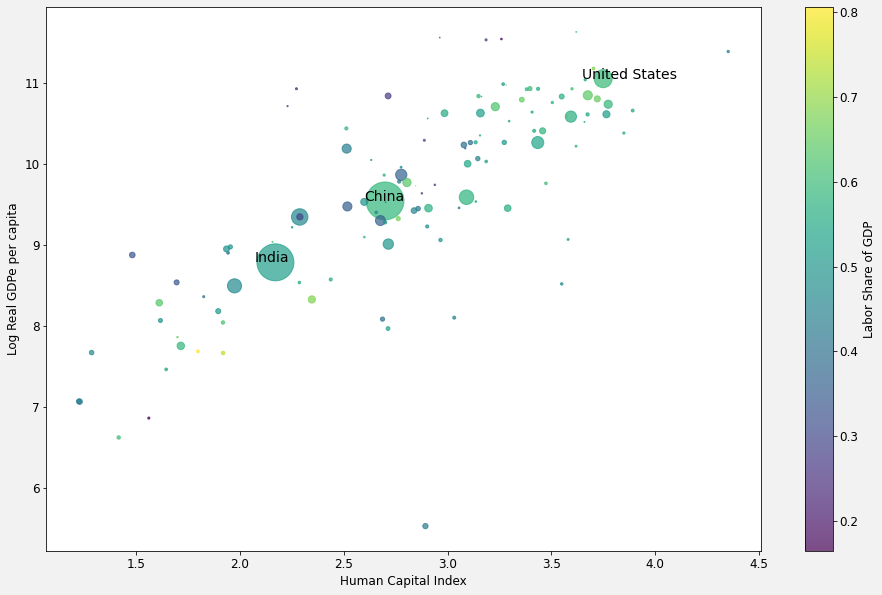

In [56]:
fig, ax = plt.subplots()
s=ax.scatter(x=pwt2019.hc, y=np.log(pwt2019.rgdpe_per_pers), 
               c=pwt2019.labsh, s=pwt2019["pop"], alpha=.7)
for index, country in BIG.iterrows():
    s.axes.text(country.hc-.1, np.log(country.rgdpe_per_pers), country.country)
ax.set_xlabel("Human Capital Index")
ax.set_ylabel("Log Real GDPe per capita")
cb = plt.colorbar(s, ax=ax)
cb.set_label("Labor Share of GDP")

fig.savefig("rgdpxhc.png", dpi=200)

Why did I use pwt2019["pop"] instead pwt2019.pop above? Because .pop is already used as an attribute of a list

In [58]:
import statsmodels.formula.api as smf

In [59]:
fit0 = smf.ols('np.log(rgdpe_per_pers) ~ hc', data=pwt2019).fit()
a = fit0.params[0]
b = fit0.params[1]
x = np.linspace(1,4.5,100)
fitted = a+b*np.linspace(1,4.5,100)


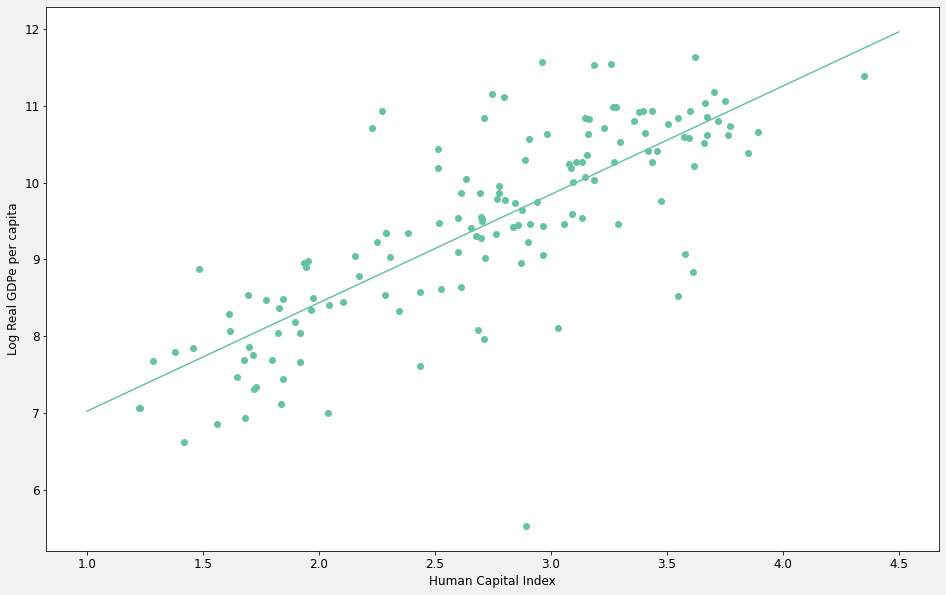

In [60]:
fig, ax = plt.subplots()
ax.scatter(x=pwt2019.hc, y=np.log(pwt2019.rgdpe_per_pers))
ax.set_xlabel("Human Capital Index")
ax.set_ylabel("Log Real GDPe per capita")
ax.plot(x, fitted, "-")

### Seaborn

Superimposing regression lines on top of data is something we will do often in this course. It would be nice to have a quick way of doing it.

Luckily, by using the [Seaborn package](https://seaborn.pydata.org), we can quickly create a scatter plot with a regression line superimposed. 

In [186]:
import seaborn as sns

In [187]:
pwt2019["log_rgdp_pp"] = np.log(pwt2019.rgdpe_per_pers)

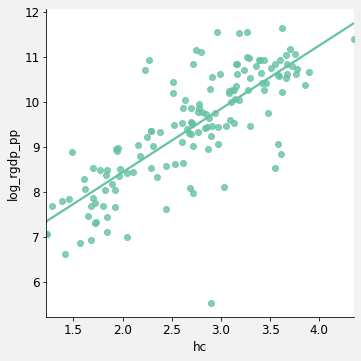

In [188]:
sns.lmplot(x="hc", y="log_rgdp_pp", ci=None, data=pwt2019)

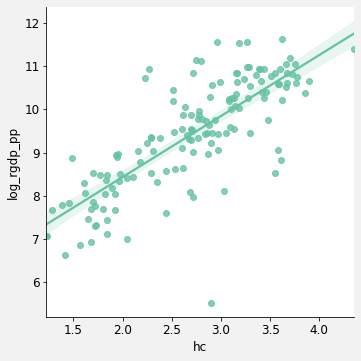

In [189]:
sns.lmplot(x="hc", y="log_rgdp_pp", ci=95, data=pwt2019)

### Multiple variables and facets

<iframe src="https://ntnu.cloud.panopto.eu/Panopto/Pages/Embed.aspx?id=b8c40738-19f8-41bc-b91c-aee600d94076&autoplay=false&offerviewer=true&showtitle=true&showbrand=true&captions=false&interactivity=all" height="405" width="720" style="border: 1px solid #464646;" allowfullscreen allow="autoplay"></iframe>

When presenting a visualisation, you are often interested in creating comparisons and contrasts. In Python and matplotlib, there are several ways of combining several plots on either the same axis or by creating multiple axis in a single figure--called faceting. 

Let us say we want to look at just a handful of countries:

In [62]:
countries = ["Norway", "Sweden", "Italy", "Germany", "United States", "China", "Vietnam",  "Japan", "Venezuela", "Argentina"]

We'll create a new limited data frame with just these countries:

In [82]:
pwtLim = pwt.loc[pwt.country.isin(countries)].copy()

In [83]:
pwtLim = pwtLim.loc[pwtLim.rgdpe_per_pers.notna()].copy() # a bit of cleaning - deleting missing data

### Pivoting between long and wide format

Below the data is presented in long format in relation to the country. That is, the country is included as a variable rather than having an individual column for Argentinian GDP, US GDP, etc. When charting is can be useful to quickly shift between long and wide format using the *pivot* function

In [66]:
pwtLim

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,ccon,cda,cgdpe,cgdpo,cn,ck,ctfp,cwtfp,rgdpna,rconna,rdana,rnna,rkna,rtfpna,rwtfpna,labsh,irr,delta,xr,pl_con,pl_da,pl_gdpo,i_cig,i_xm,i_xr,i_outlier,i_irr,cor_exp,statcap,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k,rgdpe_per_pers
350,ARG,Argentina,Argentine Peso,1950,5.030395e+04,5.010876e+04,17.091824,6.608833,2034.000000,1.816503,4.374346e+04,4.802283e+04,4.920430e+04,5.051177e+04,5.944937e+04,NaN,NaN,NaN,1.966885e+05,1.461445e+05,1.567319e+05,3.606033e+05,NaN,NaN,NaN,0.441024,0.308121,0.027629,9.160470e-13,0.200356,0.220172,0.214473,Extrapolated,Extrapolated,Estimated,Outlier,Regular,NaN,NaN,0.787090,0.084720,0.078915,0.122540,-0.060423,-0.012842,0.193067,0.422730,0.273050,0.117665,0.107814,0.292420,NaN,2943.158873
351,ARG,Argentina,Argentine Peso,1951,5.267796e+04,5.133917e+04,17.457578,6.713252,2037.866753,1.830769,4.472854e+04,5.122176e+04,5.154803e+04,5.170011e+04,6.533094e+04,NaN,NaN,NaN,2.083052e+05,1.498248e+05,1.715905e+05,3.959399e+05,NaN,NaN,NaN,0.441024,0.356293,0.028062,1.155470e-12,0.219622,0.238291,0.237590,Extrapolated,Extrapolated,Estimated,Outlier,Regular,NaN,NaN,0.787292,0.125594,0.077862,0.100497,-0.074776,-0.016469,0.213862,0.366893,0.277869,0.142259,0.118755,0.264830,NaN,3017.484132
352,ARG,Argentina,Argentine Peso,1952,4.767721e+04,4.685510e+04,17.815967,6.819321,2041.740856,1.845147,4.231723e+04,4.792718e+04,4.679066e+04,4.728033e+04,6.998556e+04,NaN,NaN,NaN,1.958982e+05,1.416762e+05,1.591909e+05,4.221388e+05,NaN,NaN,NaN,0.441024,0.309781,0.028585,1.388060e-12,0.235866,0.251158,0.248557,Extrapolated,Extrapolated,Estimated,Outlier,Regular,NaN,NaN,0.811196,0.118653,0.083832,0.077847,-0.058380,-0.033148,0.229605,0.366508,0.296447,0.126297,0.130694,0.268225,NaN,2676.094332
353,ARG,Argentina,Argentine Peso,1953,4.952967e+04,4.991715e+04,18.168618,6.927065,2045.622325,1.859638,4.226366e+04,4.822432e+04,4.863914e+04,5.037867e+04,7.454984e+04,NaN,NaN,NaN,2.041649e+05,1.411195e+05,1.605908e+05,4.502244e+05,NaN,NaN,NaN,0.441024,0.306920,0.028768,1.497830e-12,0.238649,0.254908,0.246106,Extrapolated,Extrapolated,Estimated,Outlier,Regular,NaN,NaN,0.761823,0.118317,0.077097,0.106709,-0.041785,-0.022161,0.230860,0.370191,0.315614,0.110863,0.102362,0.267306,NaN,2726.111106
354,ARG,Argentina,Argentine Peso,1954,5.183538e+04,5.225477e+04,18.517168,7.036511,2049.511172,1.874243,4.547802e+04,5.116622e+04,5.079835e+04,5.263307e+04,7.896232e+04,0.005999,0.711535,0.69132,2.108126e+05,1.518598e+05,1.695431e+05,4.755998e+05,0.128208,1.133463,0.906539,0.441024,0.294267,0.028812,1.603110e-12,0.238442,0.254360,0.245493,Extrapolated,Extrapolated,Estimated,Outlier,Regular,NaN,NaN,0.786910,0.108073,0.077148,0.108594,-0.051525,-0.029199,0.229684,0.381629,0.327768,0.094007,0.093510,0.273750,8.502229,2799.314415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,USA,United States,US Dollar,2015,1.890512e+07,1.878536e+07,320.878310,150.248474,1770.023174,3.728116,1.519205e+07,1.947383e+07,1.892736e+07,1.877585e+07,6.505779e+07,1.000000,1.000000,1.00000,1.877616e+07,1.526784e+07,1.946017e+07,6.505782e+07,0.961223,0.992851,0.989851,0.595646,0.073910,0.043634,1.000000e+00,0.981112,0.963594,0.971370,ICP PPP timeseries: benchmark or interpolated,Benchmark,Market-based,Regular,Regular,1.0,NaN,0.697479,0.228047,0.111648,0.119109,-0.171910,0.015626,0.939043,0.901439,1.243926,0.671554,0.716726,0.949906,1.000000,58916.796215
12176,USA,United States,US Dollar,2016,1.928525e+07,1.909520e+07,323.015995,152.396957,1766.744125,3.733411,1.560235e+07,1.976734e+07,1.924126e+07,1.909654e+07,6.597404e+07,1.000000,1.000000,1.00000,1.909750e+07,1.566289e+07,1.982368e+07,6.597406e+07,0.980171,0.993718,0.992240,0.593773,0.074372,0.044144,1.000000e+00,0.989006,0.974212,0.981595,ICP PPP timeseries: be

first, let's create a variable for log per capital real gdp

In [84]:
pwtLim["log_gdp_pp"] = np.log(pwtLim.rgdpe_per_pers)

Now we'll present the data pivoted to wide format:

In [85]:
pwtLim.pivot(index="year", columns="country", values="rgdpe_per_pers")

country,Argentina,China,Germany,Italy,Japan,Norway,Sweden,United States
year,,,,,,,,
1950,2943.158873,NaN,5125.100497,4714.265425,2879.177004,9424.347613,10881.212655,15733.918172
1951,3017.484132,NaN,5596.992779,5048.451298,3152.738542,10009.482258,11468.740798,16560.230799
1952,2676.094332,957.433210,6153.230364,5175.559029,3397.109909,10264.624152,11336.588767,16890.197161
1953,2726.111106,1062.740674,6684.230125,5553.697770,3515.269011,10493.160924,11627.835959,17429.463987
1954,2799.314415,975.037985,7202.203591,5788.333844,3689.565269,10725.342092,12229.159738,17039.069441
...,...,...,...,...,...,...,...,...
2015,21238.336677,12699.512421,47871.160147,37913.797428,39804.904527,61786.894587,52431.745682,58916.796215
2016,20946.914692,13161.635403,49140.571704,39737.111019,38999.320345,59399.239071,53319.292829,59703.706004
2017,23354.458779,13723.322277,51265.231829,40779.130154,39241.259353,61759.097250,54981.666390,60768.010912


Notice that we have selected *rgdpe_per_pers* as our variable of interest, and then we have created seperate columns for each country.

Now we can use our pivot function to plot multiple lines on the same plot in one line: 

<AxesSubplot:xlabel='year'>

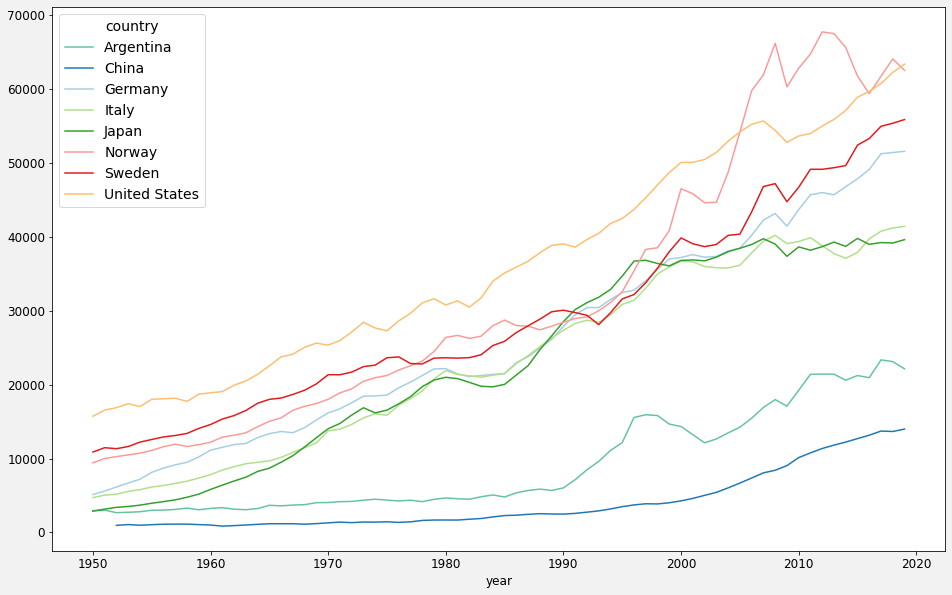

In [69]:
pwtLim.pivot(index="year", columns="country", values="rgdpe_per_pers").plot()

Since we might be interested in comparing growth rates, we can log the data:

<AxesSubplot:xlabel='year'>

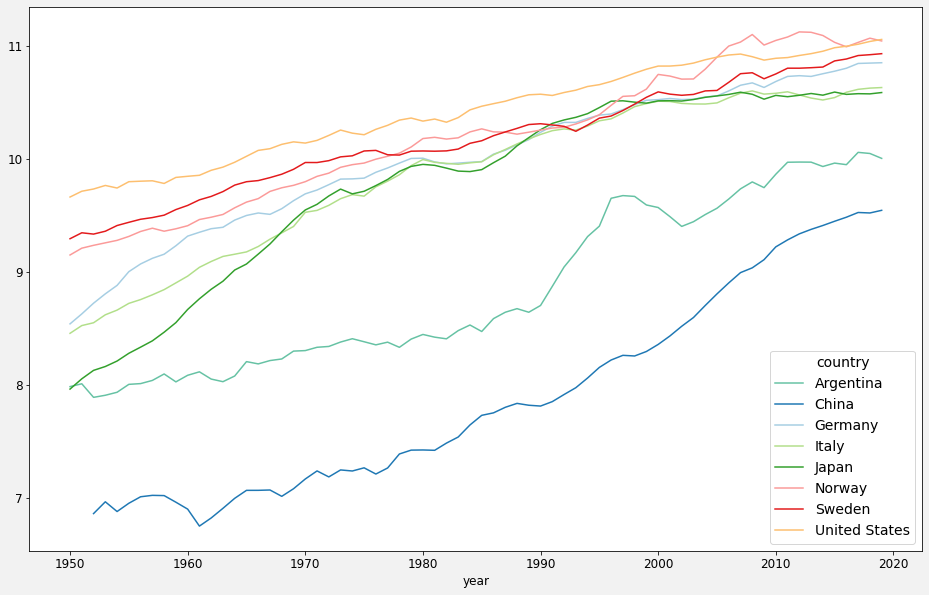

In [70]:
pwtLim.pivot(index="year", columns="country", values="log_gdp_pp").plot()

#### Transforming to an index

If we want to see relative changes over time between categories, it can often be instructive to transform variables into an index with a common starting point. 

Below we will creat a real per-capita GDP index with a common minimum value of 100. We can then observe the growth of these countries relative to their starting point. 

We use the *transform* function and our split-apply-combine methodology to create our index (See [lab 3](https://nbviewer.org/url/jmaurit.github.io/anv_statistikk/lab3.ipynb))

In [86]:
pwtLim["gdp_index"] = pwtLim.groupby("country")["rgdpe_per_pers"].transform(lambda x: x/min(x)*100)

We can then plot our indexes

Text(2010, 1500, 'China')

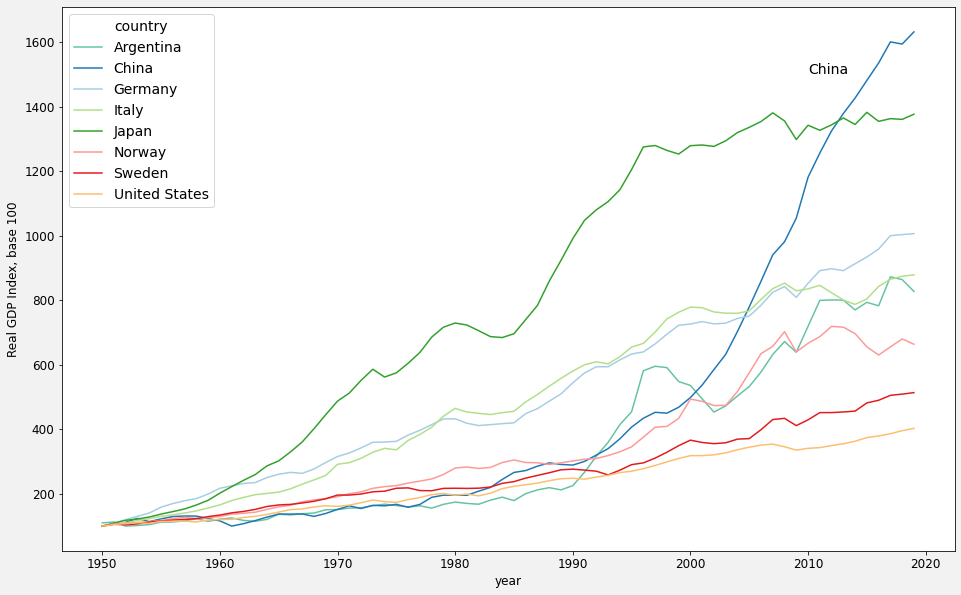

In [87]:
fig, ax = plt.subplots()
pwtLim.pivot(index="year", columns="country", values="gdp_index").plot(ax=ax)
ax.set_ylabel("Real GDP Index, base 100")
ax.text(2010,1500, "China")

You have to be a little careful when interpreting index data. The yellow line represents USA, and looking at the 2020 data, you might be tempted to think that the US is a relatively poor country. This is not the case! Rather, it mainly represents that in 1950, the US was already a quite rich country, and its relative growth has been lower. Real GDP has increased by about a factor of 4, where in China (which was a very poor country in 1950), real per-capita GDP has increased by a factor of 160! But absolute real GDP per-capita is still higher in the US.

### Faceting

Sometimes you don't want to show multiple plots on the same axis, either because it becomes to visually messy, or because units are different (you should avoid multiple units on the same y-axis for example). Instead, creating multiple axis in the same figure--called faceting-- is a good solution. 

Let's start at looking at per-capital real GDP again in wide format:

In [74]:
GDP = pwtLim.pivot(index="year", columns="country", values="rgdpe_per_pers")
GDP

country,Argentina,China,Germany,Italy,Japan,Norway,Sweden,United States
year,,,,,,,,
1950,2943.158873,NaN,5125.100497,4714.265425,2879.177004,9424.347613,10881.212655,15733.918172
1951,3017.484132,NaN,5596.992779,5048.451298,3152.738542,10009.482258,11468.740798,16560.230799
1952,2676.094332,957.433210,6153.230364,5175.559029,3397.109909,10264.624152,11336.588767,16890.197161
1953,2726.111106,1062.740674,6684.230125,5553.697770,3515.269011,10493.160924,11627.835959,17429.463987
1954,2799.314415,975.037985,7202.203591,5788.333844,3689.565269,10725.342092,12229.159738,17039.069441
...,...,...,...,...,...,...,...,...
2015,21238.336677,12699.512421,47871.160147,37913.797428,39804.904527,61786.894587,52431.745682,58916.796215
2016,20946.914692,13161.635403,49140.571704,39737.111019,38999.320345,59399.239071,53319.292829,59703.706004
2017,23354.458779,13723.322277,51265.231829,40779.130154,39241.259353,61759.097250,54981.666390,60768.010912


Let's compare Norwegian and Swedish real GDP but in two seperate axis:

Text(0, 0.5, 'Real GDP, Sweden')

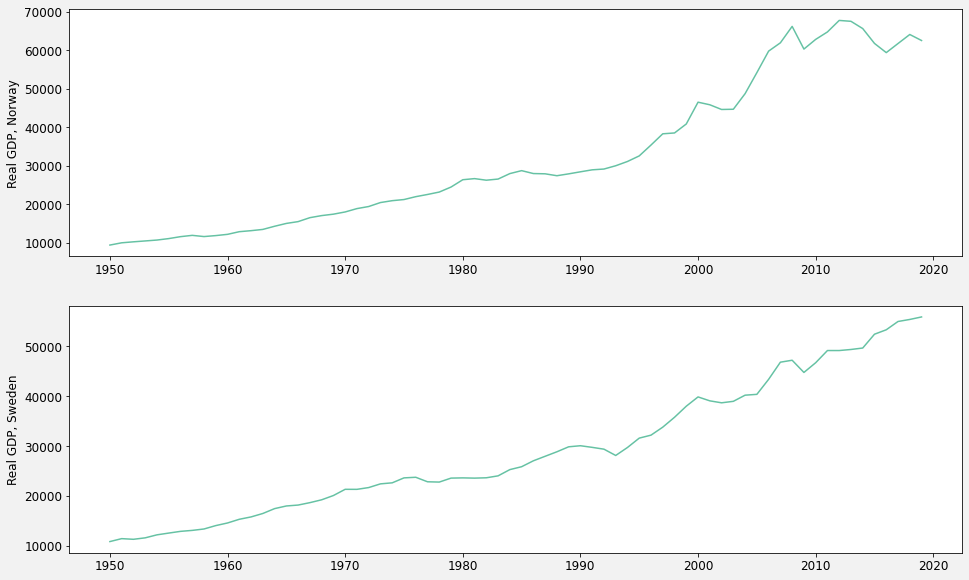

In [75]:
fig, ax = plt.subplots(2)
ax[0].plot(GDP["Norway"])
ax[1].plot(GDP["Sweden"])
ax[0].set_ylabel("Real GDP, Norway")
ax[1].set_ylabel("Real GDP, Sweden")

Now let's say we want to display 4 series in a 2x2 grid: 

Text(0, 0.5, 'Real GDP, China')

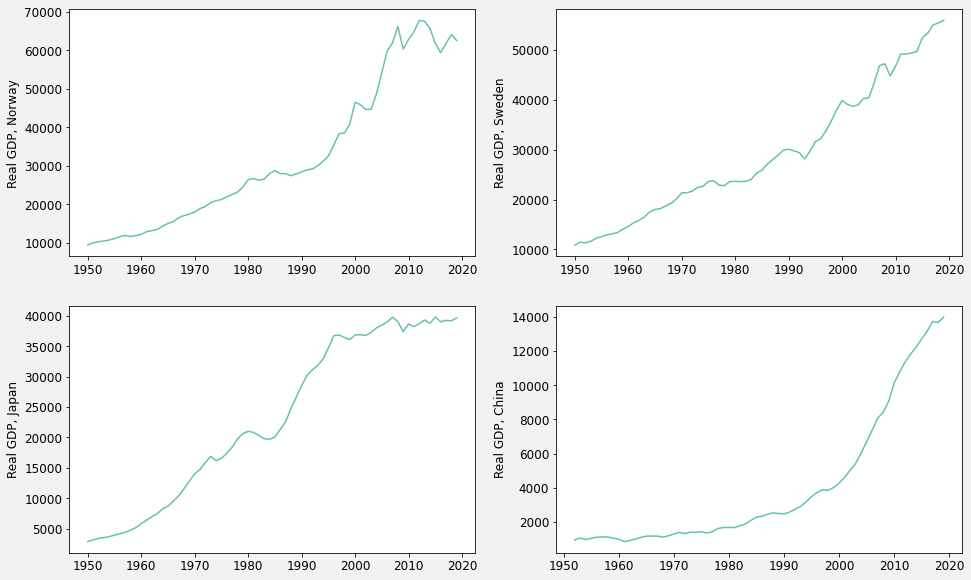

In [76]:
fig, ax = plt.subplots(2, 2)
ax[0,0].plot(GDP["Norway"])
ax[0,1].plot(GDP["Sweden"])
ax[1,0].plot(GDP["Japan"])
ax[1,1].plot(GDP["China"])
ax[0,0].set_ylabel("Real GDP, Norway")
ax[0,1].set_ylabel("Real GDP, Sweden")
ax[1,0].set_ylabel("Real GDP, Japan")
ax[1,1].set_ylabel("Real GDP, China")

#### Histograms

To get an idea of the distribution of certain series, histograms are a common tool. Faceting can be a valuable tool in seeing how distributions change. 

Below, we will take a look at how the distribution of rgdp has changed by decade. We start by defining which years we want to look at: 

In [77]:
decades = [1959, 1969, 1979, 1989, 1999, 2009, 2019]
decadePwt = pwt.loc[pwt.year.isin(decades)]

In [78]:
decadePwt = decadePwt.loc[decadePwt.rgdpe_per_pers.notna()].copy() #deleting missing data

In [ ]:
First, our overall distribution of real GDP

<AxesSubplot:ylabel='Frequency'>

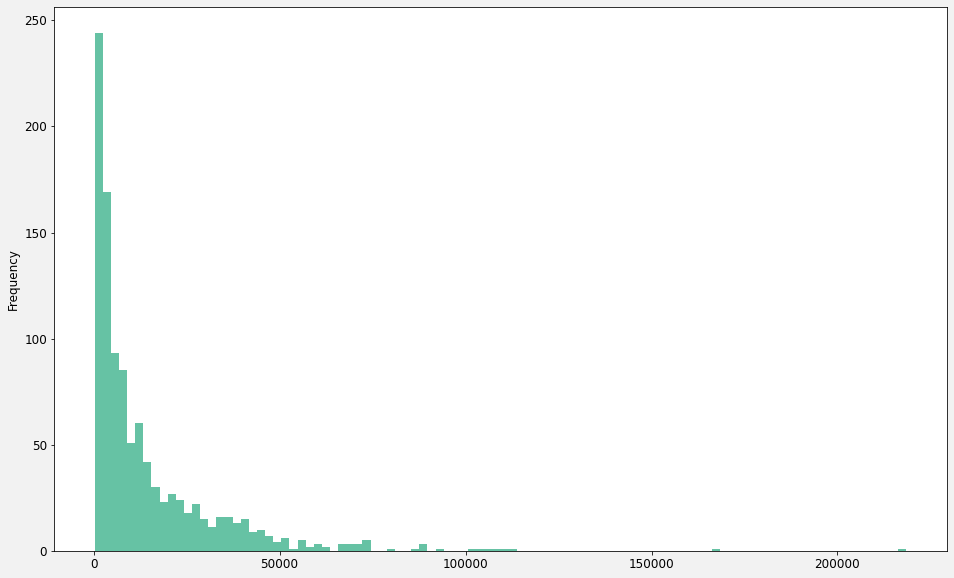

In [79]:
decadePwt.rgdpe_per_pers.plot.hist(bins=100)

Then we group our data frame by year:

In [80]:
byDecade = decadePwt.groupby("year")



Then we can iterate through our grouped dataframe, creating 7, with a histogram for each of the years:

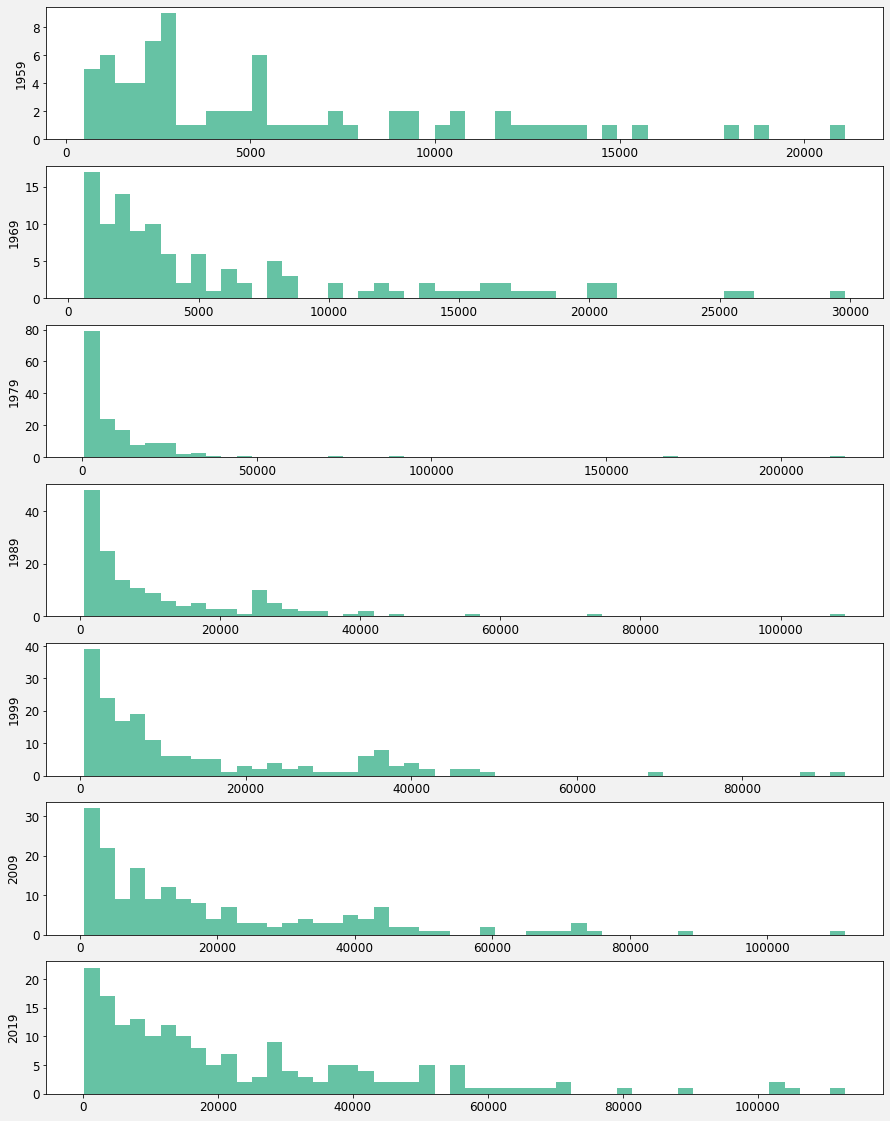

In [81]:
labels = ["1959","1969", "1979", "1989", "1999", "2009", "2019"]

fig, ax = plt.subplots(7)
i=0
for decade in byDecade:
    ax[i].hist(decade[1].rgdpe_per_pers, bins=50)
    ax[i].set_ylabel(labels[i])
    i+=1
fig.set_size_inches(15, 20)  

## Assignment

### 1. Employment

a. Create a variable for the employment rate in the country (employment(emp)/population(pop)). Also create a variable for real GDP growth. (Hint: you will need to use groupby and transform. For a function you can also make use of the *shift* operator, where if we have a pandas series, x, then x.shift() will shift the whole series forward by 1.) 

b. For the 2019 data, make a scatter plot of the employment rate vs. real GDP growth. Represent population as the size of the dots. Add text labels to a handful of the variables. 

c. Plot the employment rate against another variable that might explain differences in employment rate. Overlay a regression line on the chart

### 2.  Inflation over time

a. Create a new variable that measures inflation using the index variable *pl_c*, price level of household consumption (Hint: use groupby and transform as well as the shift operator to create the variable

b. Plot inflation over time for a handful of countries. Use both a single axis and faceting


### 3. Import data of your choice

a. Use color and/or size to represent one of the variables in a chart

b. Present multiple series either on the same axis or with multiple facets

c. Interpret the charts, explaining what the comparison/contrast is that you wish to communicate